# Chapter_01_EDA

## 1.1 EDA Process

EDA에 대한 간략한 과정을 설명하도록 하겠다.

- 일단 데이터의 출처와 주제에 대해 이해한다.( 가장 중요하다. 긴 시간이 걸려도 좋다.)
- 데이터의 크기를 알아본다.
- 데이터의 구성요소를 알아본다.

- feature의 속성 탐색
- feature간의 상관관계 탐색

- 데이터의 시각화

보통 이정도로 이루어진다고 보면 된다.

## 1.2 멕시코풍 프랜차이즈 chipotle의 주문 데이터 분석하기

가장 먼저 이 데이터로부터 얻고자 하는 goal 을 확립한다.

- 가장 많이 판매된 메뉴 top10 은 무엇일까?
- 메뉴별 판매량은 얼마나 될까?
- 메뉴별 가격대는 얼마일까?

### 1.2.1 데이터의 기초 정보 살펴보기

In [2]:
# 분석에 사용할 기본적인 라이브러리를 임포트 해준다.
# 넘파이, 판다스, 맷플롭립이다.

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# 파일을 불러와준다. 

file_path = (r"C:\users\thinp\data\chipotle.tsv")
chipo = pd.read_csv(file_path, sep = '\t')

In [3]:
# 가장 먼저 데이터셋의 크기를 알아본다.

chipo.shape

(4622, 5)

In [4]:
# 데이터 타입에 대해서 알아보자.

chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


In [5]:
# 데이터 포인트들이 어떻게 생겼는지 알아보자.

chipo.head(20)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


.head()로 살펴본 해당 데이터셋의 feature 들의 의미는 다음과 같다.

- order_id : 주문 번호
- quantity : item의 주문량
- item_name : 주문한 item의 이름
- choice_description : 주문한 item의 상세 옵션
- item_price : 주문한 item의 가격

In [6]:
# descriebe() 함수로 기초 통계량을 알아보자.
# 수치형 feature는 'quantity' 뿐이기 때문에 이것만 알아보자.

# order_id는 숫자의 의미를 가지지 않기 때문에 str로 형변환 해준다.
chipo['order_id'] = chipo['order_id'].astype(str)
print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [7]:
# 범주형 feature 인 'order_id' 와 'item_name' 은 unique() 함수를 통해서 개수를 파악한다.

print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))

1834
50


### 1.2.2 인사이트의 발견: 탐색과 시각화하기

가장 많이 주문한 아이템 Top10

In [8]:
# DataFrame['column'] 의 형태에 value_counts() 함수를 적용하는 방식을 사용한다.
# DataFrame['column'] 는 Series라는 객체를 반환하는데, value_counts() 함수는 오직 Series 객체에만 적용되기 때문이다.

item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(),1): # 인수가 두개일 때는 뒤에 인수는 1부터 시작하라는 뜻이다.
    print("top", idx, ":", val, cnt)

top 1 : Chicken Bowl 726
top 2 : Chicken Burrito 553
top 3 : Chips and Guacamole 479
top 4 : Steak Burrito 368
top 5 : Canned Soft Drink 301
top 6 : Steak Bowl 211
top 7 : Chips 211
top 8 : Bottled Water 162
top 9 : Chicken Soft Tacos 115
top 10 : Chips and Fresh Tomato Salsa 110


아이템별 주문 개수와 총량

In [9]:
# groupby() 함수를 사용해보겠다.
# 먼저 아이템별 주문 개수

order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [10]:
# 아이템별 주문 총량

item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

시각화

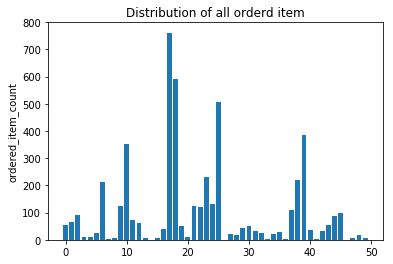

In [11]:
# tolist()  와 넘파이의 arrange() 함수를 이용해 x_pos 를 선언,
# y값에는 주문 총량에 해당하는 값인 item_quantity.values.tolist()를 넣는다.

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align = 'center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')

plt.show()

### 1.2.3 데이터 전처리: 전처리 함수 사용하기

item_price 의 수치적 특징을 탐색하는 과정에서 우리는 item_price 의 요약 통계를 구할 수 없었다.

이러한 문자열 타입에 대한 전처리를 실시해보겠다.

In [12]:
print(chipo.info())
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null object
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(1), object(4)
memory usage: 180.6+ KB
None


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [13]:
# 가격에 $ 표시가 붙어 있다. 이걸 제거해서 수치형으로 바꿔 주겠다.

chipo['item_price'] = chipo['item_price'].apply(lambda x : float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


### 1.2.4 탐색적 분석: 스무고개로 개념적 탐색 분석하기

주문당 평균 계산금액 출력하기

In [14]:
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

한 주문에 10달러 이상 지불한 주문 번호(id) 출력하기

In [15]:
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]

print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


각 아이템의 가격 구하기

In [16]:
chipo_one_item = chipo[chipo.quantity ==1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by = "item_price", ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


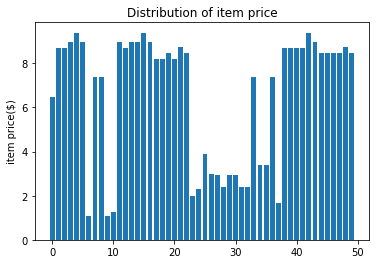

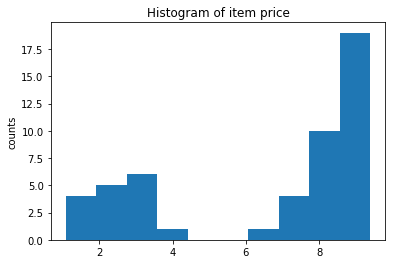

In [17]:
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align = 'center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
plt.show()

plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()

가장 비싼 주문에서 아이템이 총 몇개 팔렸는지 구하기

In [18]:
# order_id에 그룹별 합계 연산을 적용하고,
# sort_values를 반환한다.

chipo.groupby('order_id').sum().sort_values(by = 'item_price', ascending = False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


'Veggie Salad Bowl' 이 몇 번 주문되었는지 구하기

In [19]:
# Veggie Salad Bowl 이 몇 번 주문되었는지 구한다.
chipo_salad = chipo[chipo['item_name'] == "Veggie Salad Bowl"]

# 한 주문 내에서 중복 집계된 item_name 을 제거합니다.
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id'])

print(len(chipo_salad))
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


'Chicken Bowl'을 2개 이상 주문한 주문 횟수 구하기

In [20]:
# 'Chicken Bowl' 을 2개 이상 주문한 주문 횟수를 구합니다.

chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >=2]

print(len(chipo_chicken_result))
chipo_chicken_result.head(5)

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64

## 1.3 국가별 음주 데이터 분석하기

### 1.3.1 탐색 : 데이터의 기초 정보 살펴보기

In [21]:
file_path = (r"C:\users\thinp\data\drinks.csv")
drinks = pd.read_csv(file_path)

In [22]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [23]:
drinks.shape

(193, 6)

In [24]:
drinks.info()
print("----------------------------------------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB
----------------------------------------------------------


대충 데이터를 살펴보니 해당 데이터셋의 특징은 다음과 같습니다.

- 총 193개의 row와 6개의 feature가 있습니다. 이는 193개국에 대한 6개의 feature 값의 DataFrame 입니다.

feature 값은 총 6개인데, 다음과 같습니다.

- country : 국가명
- beer : 맥주 소비량
- spirit : 증류주 소비량(소주, 보드카 등)
- wine : 와인 소비량
- total : 총 알콜 소비량
- continent : 해당 국가의 소속 대륙

기본적으로 국가와 대륙값은 obj로 되어있고, 소비량은 int값으로 되어있다. total 만 float(실수)로 되어있다.

특이점으로는 대륙값만 결측값이 있다.

In [25]:
drinks.describe()

# 중간값과 평균값이 매우 유의미한 차이를 보인다.
# 최소값과 최대값도 매우 큰 폭의 편차를 보인다.

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [26]:
# 근데 column 명이 너무 다들 길고 치기 귀찮으니까 좀 간결하게 처리해주자.

drinks.rename(columns={'beer_servings':'beer', 'spirit_servings':'spirit',
                                 'wine_servings':'wine','total_litres_of_pure_alcohol':'total'}, inplace=True)



#[출처] DS:데이터 사이언스:컬럼명, 인덱스 바꾸기|작성자 curious Jaeger

In [27]:
drinks.head(3)
# 아주 깔끔하다.

,country,beer,spirit,wine,total,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF


### 1.3.2 인사이트의 발견: 탐색과 시각화하기

feature 간의 상관관계를 살펴보겠습니다. 상관계수라는 개념을 먼저 알아야 합니다. 이것은 다른 책에서 공부합시다.

In [28]:
# beer와 wine 의 상관관계부터 살펴보자.
# pearson 상관계수를 사용해보겠다.

corr = drinks[['beer', 'wine']].corr(method = 'pearson')
print(corr)

          beer      wine
beer  1.000000  0.527172
wine  0.527172  1.000000


In [29]:
# 보통 0.7이 넘어가야 유의미하다고 볼 수 있다. 그래도 양의 상관관계를 가지고 있구만.
# 다른 것들도 교차로 봐보자.

cols = ['beer', 'spirit', 'wine', 'total']
corr = drinks[cols].corr(method = 'pearson')
print(corr)

            beer    spirit      wine     total
beer    1.000000  0.458819  0.527172  0.835839
spirit  0.458819  1.000000  0.194797  0.654968
wine    0.527172  0.194797  1.000000  0.667598
total   0.835839  0.654968  0.667598  1.000000


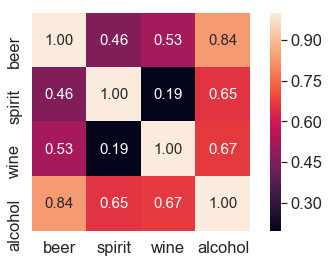

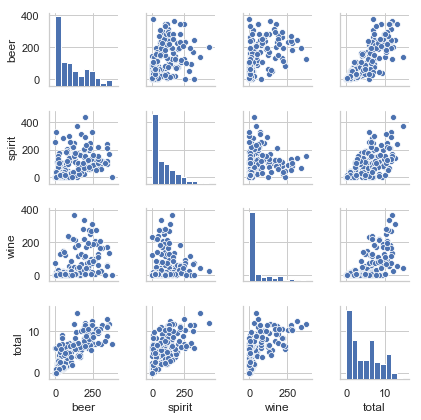

In [30]:
# seaborn 을 통해서 시각화를 해봅시다.

import seaborn as sns

cols_view = ['beer', 'spirit', 'wine', 'alcohol']
sns.set(font_scale = 1.5)
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size':15},
                yticklabels = cols_view,
                xticklabels = cols_view)

plt.tight_layout()
plt.show()

# 시각화 라이브러리를 이용한 feature 간의 산점도 그래프를 출력합니다.

sns.set(style = 'whitegrid', context= 'notebook')
sns.pairplot(drinks[['beer', 'spirit', 'wine', 'total']], height = 1.5)

plt.show()

전체적으로 모든 종류의 술 소비량과 전체 소비량은 양의 상관관계를 보이고 있습니다.

특히나 맥주 소비량이 많은 국가에서 전체 소비량이 강한 상관관계를 나타내는 것으로 나타납니다.

증류주와 와인은 0.19라는 매우 낮은 상관관계를 가지는 것으로 봐서 상관관계가 있다고 보기는 어려운 것 같습니다.

### 1.3.3 탐색적 분석 : 스무고개로 개념적 탐색 분석하기

In [31]:
# 아까 대륙값에 결측값이 있었습니다.
# 결측값을 others, OT 라고 채워주려 합니다.

drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer,spirit,wine,total,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


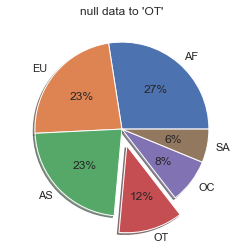

In [32]:
# OT 가 차지하는 비율을 파이차트로 알아봅시다.

labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0,0,0,0.2,0,0)

plt.pie(fracs1, explode = explode, labels= labels, autopct= '%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

In [33]:
# drinks['continent'].value_counts().index.tolist()

In [34]:
# drinks['continent'].value_counts().values.tolist()

#### 대륙별 spirit 의 통계적 정보는 어느 정도일까?

agg() 함수는 apply() 함수와 비슷하지만, 그룹에 대한 여러 가지 연산 결과를 동시에 얻을 수 있는 함수이다.

In [35]:
# 대륙별 spirit 의 평균 최소 최대 합계를 계산해보자.

result = drinks.groupby('continent').spirit.agg(['mean', 'min', 'max', 'sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


#### 전체 평균보다 많은 알콜을 섭취하는 대륙은 어디일까?

agg() 나 apply() 없이도 mean() 으로 탐색할 수 있다.

In [36]:
total_mean = drinks.total.mean()
continent_mean = drinks.groupby('continent')['total'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total, dtype: float64


#### 평균 beer 소비량이 가장 높은 대륙은 어디일까?

mean() 함수만을 이용한 탐색에 idxmax() 함수를 적용하면 쉽게 찾을 수 있다. idxmax()는 시리즈 객체에서 값이 가장 큰 index를 반환한다.

In [37]:
beer_continent = drinks.groupby('continent').beer.mean().idxmax()
print(beer_continent)

EU


#### 시각화

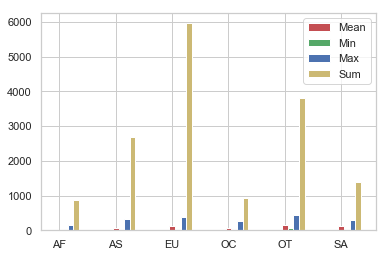

In [38]:
# 대륙별 spirit 의 평균, 최소, 최대, 합계를 시각화합니다.

n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color= 'r', label = 'Mean')
rects2 = plt.bar(index+ bar_width, mins, bar_width, color= 'g', label = 'Min')
rects3 = plt.bar(index+ bar_width *2, maxs, bar_width, color= 'b', label = 'Max')
rects4 = plt.bar(index+ bar_width *3, sums, bar_width, color= 'y', label = 'Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

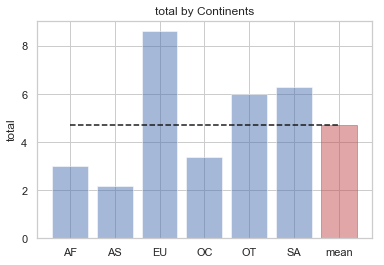

In [39]:
# 대륙별 total 을 시각화합니다.

continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align= 'center', alpha = 0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0, 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total')
plt.title('total by Continents')

plt.show()

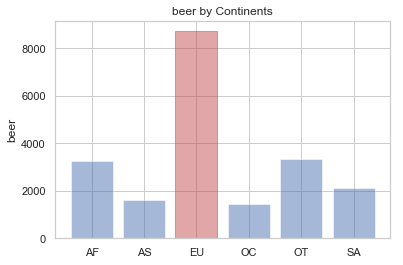

In [40]:
# 대륙별 beer 를 시각화 합니다.

beer_group = drinks.groupby('continent')['beer'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos, alcohol, align = 'center', alpha = 0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer')
plt.title('beer by Continents')

plt.show()

In [41]:
# 미니퀴즈 해보자. 1-3

means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

print(means)
print(mins)
print(maxs)
print(sums)

[16.339622641509433, 60.84090909090909, 132.55555555555554, 58.4375, 165.7391304347826, 114.75]
[0, 0, 0, 0, 68, 25]
[152, 326, 373, 254, 438, 302]
[866, 2677, 5965, 935, 3812, 1377]


In [42]:
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


### 1.3.4 통계적 분석 : 분석 대상 간의 통계적 차이 검정하기

지금까지 상관관계를 살펴보았으나, 이러한 분석은 주관적이므로 타당성을 부여해주어야 한다.

가장 기본적인 t 검정을 해보자.

In [43]:
# 파이썬에는 scipy 라이브러리에서 t-test를 제공한다.

# 아프리카와 유럽 간의 맥주 소비량 차이를 검정합니다.
africa = drinks.loc[drinks['continent']=='AF']
europe = drinks.loc[drinks['continent']=='EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer'], europe['beer'])
tTestResultDiffVar = stats.ttest_ind(africa['beer'], europe['beer'], equal_var = False)

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f" %tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" %tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000


#### 대한민국은 얼마나 술을 독하게 마시는 나라일까?

In [44]:
# total_servings feature 를 생성한다.

drinks['total_servings'] = drinks['beer'] + drinks['wine'] + drinks['spirit']

# 술 소비량 대비 알코올 비율 feature를 생성한다.

drinks['alcohol_rate'] = drinks['total'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

# 순위 정보를 생성합니다.

country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by = ['alcohol_rate'], ascending=0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


#### 국가별 순위 정보를 시각화하기

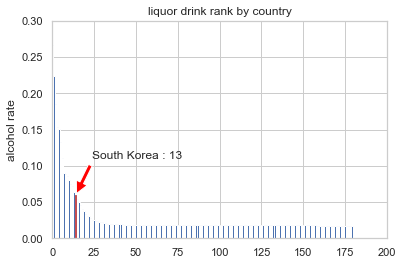

In [45]:
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by country')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank - 1),
            xy = (korea_rank, korea_alc_rate),
            xytext = (korea_rank +10, korea_alc_rate + 0.05),
            arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

## 1.4 연습문제

두 번째 예제인 국가별 음주 데이터를 통해서 다음과 같은 문제를 해결해보자.

- 1. 대륙별 wine 을 탐색한다.
- 2. 국가별 모든 servings 의 합을 계산한 total_servings 라는 feature를 생성한다.
- 3. 전체 평균보다 적은 알코올을 마시는 대륙 중, spirit을 가장 많이 마시는 국가를 찾아본다.
- 4. 술 소비량 대비 알코올 비율을 구해본다.
- 5. 대륙별로 술 소비량 대비 알코올 비율을 계산해보자.

# Chapter2 Text Mining

## 2.1 웹 크롤링으로 기초 데이터 수집하기

In [1]:
pip install lxml beautifulsoup4 requests

Note: you may need to restart the kernel to use updated packages.


#### 웹 크롤링 라이브러리 사용하기

In [3]:
import requests
from bs4 import BeautifulSoup
import re

In [4]:
# 크롤링할 사이트 주소를 정의합니다.
source_url = "https://namu.wiki/RecentChanges"

# 사이트의 HTML 구조에 기반하여 크롤링을 수행합니다.
req = requests.get(source_url)
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="table")
table_body = contents_table.find(name="tbody")
table_rows = table_body.find_all(name="tr")

# a 태그의 href 속성을 리스트로 추출하여 크롤링할 페이지 리스트를 생성합니다.
page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        if 'png' not in page_url:
            page_urls.append(page_url)
        
# 중복 url을 제거합니다.
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)

https://namu.wiki/w/%EA%B8%89%EC%8B%9D%EC%99%95%26%EA%B8%89%EC%8B%9D%EA%B1%B8%EC%A6%88/%EB%93%B1%EC%9E%A5%EC%9D%B8%EB%AC%BC
https://namu.wiki/w/%ED%94%8C%EB%A1%9C%EB%A6%AC%EB%82%98%20%EB%B9%84%EC%B9%98
https://namu.wiki/w/%EC%95%84%EB%9D%BC(%EB%B9%A0%EC%83%A4%EB%A9%94%EC%B9%B4%EB%93%9C)
https://namu.wiki/w/%EC%82%AC%EC%9D%BC%EB%9F%B0%ED%8A%B8%20%ED%9E%90:%20%EB%8B%A4%EC%9A%B4%ED%8F%AC%EC%96%B4
https://namu.wiki/w/%ED%98%B8%EC%95%84%ED%82%A8%20%EC%95%84%EB%A5%B4%EC%B9%98%EB%B0%9C%EB%8F%84%20%EA%B5%AC%EC%8A%A4%EB%A7%8C%20%EB%A1%9C%EC%97%90%EB%9D%BC


#### 텍스트 정보 수집하기

In [5]:
# 최근 변경된 문서 하나를 크롤링합니다.

req = requests.get(page_urls[0])
html = req.content
soup = BeautifulSoup(html, 'lxml')

contents_table = soup.find(name="article")
title = contents_table.find_all('h1')[0]
category= contents_table.find_all('ul')[0]
content_paragraphs = contents_table.find_all(name = "div", attrs = {"class":"wiki-paragraph"})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)

content_corpus = "".join(content_corpus_list)

print(title.text)
print("\n")
print(category.text)
print("\n")
print(content_corpus)

급식왕&급식걸즈/등장인물 


급식왕&급식걸즈


   상위 문서: 급식왕&급식걸즈   관련 문서: 급식왕&급식걸즈/사건사고   하위 문서: 알렉스 재단1. 등장인물 일람1.1.  급식왕 학교 학생들과 선생님들1.2. 조연1.2.1. 손가락쌤1.2.2. 광자&데이지 엄마1.2.2.1. 대표 대사1.2.3. 두더지 엄마1.2.3.1. 대표 대사1.2.4. 뽀글이 아줌마1.2.5. 방구 아저씨1.2.6. 흥구기 1.2.6.1. 대표 대사1.2.7. 티라노1.2.7.1. 대표 대사1.2.8. 야반장1.2.8.1. 대표 대사1.2.9. 최실장1.2.9.1. 대표 대사1.2.10. 하마형1.2.11. 단추 아저씨1.2.12. 쭈뇽이1.2.13. 이지영1.2.14. 조각쌤1.2.15. 염라대왕1.2.15.1. 대표 대사1.2.16. 저승사자1.2.17. 캐디1.2.18. 아리(구미호)1.2.19. 바가지 아주머니1.2.20. 충섭이1.2.21. 방종원1.2.22. 얌첸(얌谦)1.2.23. 레온1.2.24. 두꺼비 아저씨1.3. 빌런1.3.1. 알렉스 재단1.3.2. 메기1.3.3. 할리퀸1.3.4. 박공주1.3.4.1. 대표 대사1.3.5. 장첸(张谦)1.3.5.1. 대표 대사1.3.6. 입술괴물1.3.6.1. 대표 대사1.3.7. 미래 두더지1.3.7.1. 대표 대사1.3.8. 연쇄살인범1.3.9. 건달1.3.10. 비실이 기자1.4. 하차한 배우1.4.1. 정광진 1.4.2. 문민정1.4.3. 김기쁨1.4.4. 조은쌤1.5. 단역1.5.1. 이슬 보건쌤1.5.1.1. 기타 단역급식왕 학교 교직원&학생두더지징징이데이지머머리 교장쌤김그라쌤발가락쌤구구쌤(원더구구)깝숙이 방울이 티라노 광자 엄마 두더지 엄마두더지 아빠온달쌤아리(구미호)얌생이이계인감재바우주연 멤버는 급식왕 학교 문서에 거의 수록되어 있다.각 등장인물의 대표 대사는 2번 이상 말하면 수록하도록한 등장인물이 2개월 동안 안나오면 문서 옆에 휴먼 상태라 서술하시오.새로운 등장인물은 밑에서부터 기재해주십시오. 급식왕

In [6]:
# 최근 변경된 문서 하나를 크롤링합니다.

req = requests.get(page_urls[0])
html = req.content
soup = BeautifulSoup(html, 'lxml')

contents_table = soup.find(name="article")
title = contents_table.find_all('h1')[0]
category= contents_table.find_all('ul')[0]
content_paragraphs = contents_table.find_all(name = "div", attrs = {"class":"wiki-paragraph"})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
    
print(content_corpus_list)

[' \xa0 상위 문서: 급식왕&급식걸즈', ' \xa0 관련 문서: 급식왕&급식걸즈/사건사고', ' \xa0 하위 문서: 알렉스 재단', '1. 등장인물 일람1.1.  급식왕 학교 학생들과 선생님들1.2. 조연1.2.1. 손가락쌤1.2.2. 광자&데이지 엄마1.2.2.1. 대표 대사1.2.3. 두더지 엄마1.2.3.1. 대표 대사1.2.4. 뽀글이 아줌마1.2.5. 방구 아저씨1.2.6. 흥구기 1.2.6.1. 대표 대사1.2.7. 티라노1.2.7.1. 대표 대사1.2.8. 야반장1.2.8.1. 대표 대사1.2.9. 최실장1.2.9.1. 대표 대사1.2.10. 하마형1.2.11. 단추 아저씨1.2.12. 쭈뇽이1.2.13. 이지영1.2.14. 조각쌤1.2.15. 염라대왕1.2.15.1. 대표 대사1.2.16. 저승사자1.2.17. 캐디1.2.18. 아리(구미호)1.2.19. 바가지 아주머니1.2.20. 충섭이1.2.21. 방종원1.2.22. 얌첸(얌谦)1.2.23. 레온1.2.24. 두꺼비 아저씨1.3. 빌런1.3.1. 알렉스 재단1.3.2. 메기1.3.3. 할리퀸1.3.4. 박공주1.3.4.1. 대표 대사1.3.5. 장첸(张谦)1.3.5.1. 대표 대사1.3.6. 입술괴물1.3.6.1. 대표 대사1.3.7. 미래 두더지1.3.7.1. 대표 대사1.3.8. 연쇄살인범1.3.9. 건달1.3.10. 비실이 기자1.4. 하차한 배우1.4.1. 정광진 1.4.2. 문민정1.4.3. 김기쁨1.4.4. 조은쌤1.5. 단역1.5.1. 이슬 보건쌤1.5.1.1. 기타 단역', '급식왕 학교 교직원&학생', '두더지', '징징이', '데이지', '머머리 교장쌤', '김그라쌤', '발가락쌤', '구구쌤(원더구구)', '깝숙이', ' 방울이 ', '티라노', ' 광자 엄마 ', '두더지 엄마', '두더지 아빠', '온달쌤', '아리(구미호)', '얌생이', '이계인', '감재바우', '주연 멤버는 급식왕 학교 문서에 거의 수록되어 있다.각 등장인물의 대표 대사는 2번 이상 말

## 2.2 나무위키 최근 변경 페이지 키워드 분석하기

### 2.2.1 크롤링 : 웹 데이터 가져오기

In [7]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re

In [8]:
# 크롤링할 사이트 주소를 정의합니다.
source_url = "https://namu.wiki/RecentChanges"

# 사이트의 HTML 구조에 기반하여 크롤링을 수행합니다.
req = requests.get(source_url)
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="table")
table_body = contents_table.find(name="tbody")
table_rows = table_body.find_all(name="tr")

# a 태그의 href 속성을 리스트로 추출하여 크롤링할 페이지 리스트를 생성합니다.
page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        page_urls.append(page_url)
        
# 중복 url을 제거합니다.
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)

https://namu.wiki/w/A%20Bizarre%20Day
https://namu.wiki/w/%EC%B9%A0%EB%A6%AC%EB%A7%9B%20%EC%BF%A0%ED%82%A4
https://namu.wiki/w/%EC%84%9C%EC%9C%A4(%EC%B9%B4%EC%9A%B4%ED%84%B0%EC%82%AC%EC%9D%B4%EB%93%9C)
https://namu.wiki/w/%EC%86%8C%EC%9A%B8(%EC%95%A0%EB%8B%88%EB%A9%94%EC%9D%B4%EC%85%98)
https://namu.wiki/w/%EC%A0%95%ED%98%9C%EB%A6%AC


이제 이 주소들에 다시 한 번 접근하여 문서의 본문과 제목, 그리고 카테고리에 등장하는 텍스트 데이터를 가져와봅시다.

In [12]:
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비합니다.

columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns = columns)

# 각 페이지별 제목, 카테고리, 본문 정보를 데이터 프레임으로 만듭니다.

for page_url in page_urls:
    
    # 사이트의 HTML 구조에 깁나하여 크롤링을 수행합니다.
    req = requests.get(page_url)
    html = req.content
    soup = BeautifulSoup(html, 'lxml')
    contents_table = soup.find(name = "article")
   
    title = contents_table.find_all('h1')[0]
    category = contents_table.find_all('ul')[0]
    content_paragraphs = contents_table.find_all(name="div", attrs = {"class":"wiki-paragraph"})
    
    content_corpus_list = []
    
    # 페이지 내 제목 정보에서 개행 문자를 제거한 뒤 추출합니다.
    # 만약 없는 경우, 빈 문자열로 대체합니다.
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
        
    # 페이지 내 본문 정보에서 개행 문자를 제거한 뒤 추출합니다.
    # 만약 없는 경우, 빈 문자열로 대체합ㄴ디ㅏ.
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append(" ")
    else:
        content_corpus_list.append("")
        
    # 페이지 내 카테고리 정보에서 "분류"라는 단어와 개행 문자를 제거한 뒤 추출합니다.
    # 만약 없는 경우, 빈 문자열로 대체합ㄴ디ㅏ.
    if category is not None:
        row_category = category.text.replace("\n", " ").replace("분류", "")
    else:
        row_category = "" 
    
    # 모든 정보를 하나의 데이터 프레임에 저장합니다.
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)
    
df.head(5)

,title,category,content_text
0,A Bizarre Day,Roblox/게임,A Bizarre Day제작사Paradoxum Games개발 완료 날짜2019년 6...
1,칠리맛 쿠키,쿠키런: 오븐브레이크/쿠키도적 캐릭터,체리맛 쿠키와 혼동하지 말 것.쿠키런: 오븐브레이크의 등장 쿠키들 [ 펼치기 · 접...
2,서윤(카운터사이드),카운터사이드/사원,"SEO YOON서윤(CV. 우정신)""알트 소대의 리더 서윤이에요. 그나저나, 제게 ..."
3,소울(애니메이션),픽사 애니메이션 스튜디오미국 영화미국 애니메이션애니메이션 영화2020년 영화,[ 펼치기 · 접기 ] 토이 스토리 · 토이 스토리 2 · 토이 스토리 3...
4,정혜리,징벌 소녀마법소녀 캐릭터웹툰 빌런학교폭력 가해자 캐릭터,평화시 마법소녀일루미나티 뷰티정혜리아쿠아 프러시안이수진 코일 골드송치영캄파뉼라 플라...


In [13]:
df.shape

(77, 3)